# CAM


In [1]:
import os
import numpy as np
import cv2
import random
import pandas as pd
from tqdm import tqdm
import keras.backend as K
import matplotlib.pyplot as plt
import keras
import keras.backend as K
from keras.models import Model


from keras.applications.densenet import DenseNet169, DenseNet121, preprocess_input
import time


### DenseNet Model and load weights


In [2]:

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def DenseNetModel(n_classes):
    base_model = DenseNet169(input_shape=(224, 224, 3),
                          weights='imagenet',
                          include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Global Average Pooling

    predictions = Dense(n_classes, activation='sigmoid')(x)  # Softmax activation for classification
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

n_classes = 1  # Number of classes for ImageNet dataset
model = DenseNetModel(1)
#model.summary()
layerName = 'relu'

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
model.load_weights("/content/MURA_MY_DenseNet-ELBOW.h5")

In [4]:
def getImage2(path, size):
    '''
    Function to process the images
    Args:
        dataframe: contains the path to the images in the directory
        size: contains the value to which the shape of the image will resized
    '''
    Images = []
    try:
        image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
         # clipLimit -> Threshold for contrast limiting
        clahe = cv2.createCLAHE(clipLimit = 3,tileGridSize=(3,3))
        image = clahe.apply(image)
       # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print(image.shape)
        # threshold
        thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        hh, ww = thresh.shape
        print(thresh.shape)
        # make bottom 2 rows black where they are white the full width of the image
        thresh[hh-3:hh, 0:ww] = 0

        # get bounds of white pixels
        white = np.where(thresh==255)
        xmin, ymin, xmax, ymax = np.min(white[1]), np.min(white[0]), np.max(white[1]), np.max(white[0])
        #print(xmin,xmax,ymin,ymax)

        # crop the image at the bounds adding back the two blackened rows at the bottom
        crop = image[ymin:ymax+3, xmin:xmax]
        crop = cv2.resize(crop,(size,size))
        # Normalixation

        #crop=crop/255

        #image = randome_rotation_flip(image,size)
        print(crop.shape)
        rgb_array = np.stack((crop,) * 3, axis=-1)
        Images.append(rgb_array)


    except Exception as e:
        print(str(e))

    Images = np.asarray(Images).astype('float32')

   # mean = np.mean(Images)
   # std = np.std(Images)
    Images = Images/255

    #if K.image_data_format() == "channels_first":
    #plt.imshow(Images[0]) #Extended dimension 3
    #if K.image_data_format() == "channels_last":
    #  Images = np.expand_dims(Images,axis=3)             #Extended dimension 3(usebackend tensorflow:aixs=3; theano:axixs=1)
    return Images


**Step 3 : to get SuperImposition of Class Activation Mappings on Input Image**

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Model
import cv2
from tensorflow.keras.preprocessing import image
from PIL import Image

def show_imgwithheat(img_path, heatmap, alpha=0.4, return_array=False):
    """Show the image with heatmap.

    Args:
        img_path: string.
        heatmap: image array, get it by calling grad_cam().
        alpha: float, transparency of heatmap.
        return_array: bool, return a superimposed image array or not.
    Return:
        None or image array.
    """
    image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    # clipLimit -> Threshold for contrast limiting
    clahe = cv2.createCLAHE(clipLimit = 3,tileGridSize=(3,3))
    image = clahe.apply(image)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #print(heatmap.shape)
    #plt.imshow(heatmap)
    # threshold
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    hh, ww = thresh.shape
    # make bottom 2 rows black where they are white the full width of the image
    thresh[hh-3:hh, 0:ww] = 0

    # get bounds of white pixels
    white = np.where(thresh==255)
    xmin, ymin, xmax, ymax = np.min(white[1]), np.min(white[0]), np.max(white[1]), np.max(white[0])
        #print(xmin,xmax,ymin,ymax)

        # crop the image at the bounds adding back the two blackened rows at the bottom
    crop = image[ymin:ymax+3, xmin:xmax]
    img = cv2.resize(crop,(224,224))

 #Images = np.expand_dims(Images,axis=3) #Extended dimension 3
   # display(np.expand_dims(img,axis=2))
  #  img = cv2.imread(img_path)
    heatmap = (heatmap*255).astype("uint8")
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
   # heatmap = (heatmap*255).astype("uint8")
   # cv2.apply
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = heatmap * alpha + cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    superimposed_img = np.clip(superimposed_img, 0, 255).astype("uint8")
    superimposed_img = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)

    imgwithheat = Image.fromarray(superimposed_img)
    try:
        display(imgwithheat)
    except NameError:
        imgwithheat.show()

    if return_array:
        return superimposed_img

def prediction_label(p):
    if(p > 0.5):
        return 1
    else:
        return 0


# Last Conv Layer

Resnet50 'conv5_block3_out'

InceptionV3 'mixed10'

Densenet169 'relu'

(512, 337)
(512, 337)
(224, 224)
(1, 224, 224, 3)


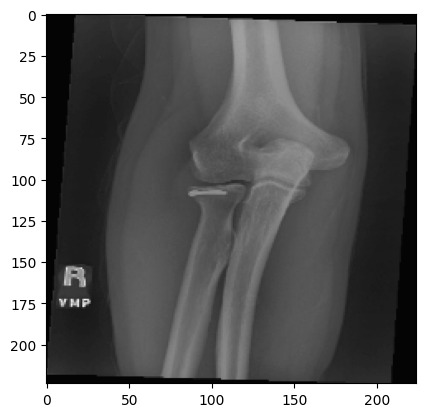

In [6]:
img_path="/content/image1 (2).png"



#image = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
#clahe = cv2.createCLAHE(clipLimit = 3,tileGridSize=(3,3))
#image = clahe.apply(image)

final_img = getImage2(img_path,224)
final_img = tf.convert_to_tensor(final_img, dtype=tf.float32)

#x=final_img[0]
plt.imshow(final_img[0])
print(final_img.shape)

# CAM

In [11]:


def cam(model, img,
             layer_name="relu", label_name=None,
             category_id=None):
    """Get a heatmap by Grad-CAM.

    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.

    Return:
        A heatmap ndarray(without color).
    """
   # img_tensor = np.expand_dims(img, axis=2)
   # img_tensor = np.expand_dims(img, axis=3)
    start_time = time.time()

    img_tensor=img
    #print(img_tensor.shape)
    print("CAM")

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model(inputs=model.inputs, outputs=[conv_layer.output, model.output])
    conv_output, predictions = heatmap_model(img_tensor)
    print(predictions)
    if category_id is None:
        category_id = prediction_label(predictions[0])
    if label_name is not None:
        print('Predicted Label: '+label_name[category_id])
    output = predictions[0]
    #print(output)dense_1
    #dense_2
   # weights = model.get_layer('dense').get_weights()
    weights = model.get_layer('dense').get_weights()
    grads   = weights[0].reshape(1,1,1,-1)

    print("g",grads.shape)
    print("c",conv_output.shape)

    heatmap = tf.reduce_sum(tf.multiply(grads, conv_output),axis=3)
    #print(heatmap.shape)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat
    #print("in cam", heatmap.shape)

    elapsed_time = time.time() - start_time
    return [np.squeeze(heatmap),predictions[0],elapsed_time]




CAM
tf.Tensor([[0.6046112]], shape=(1, 1), dtype=float32)
Predicted Label: positive
g (1, 1, 1, 1664)
c (1, 7, 7, 1664)


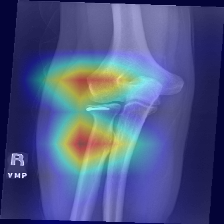

In [12]:

heatmap = cam(model, final_img, layer_name=layerName,
                       label_name=['negative', 'positive'],
                       # category_id=0,
                       )

show_imgwithheat(img_path, heatmap[0])


In [13]:

import time
def grad_cam(model, img,
             layer_name="relu", label_name=None,
             category_id=None):
    """Get a heatmap by Grad-CAM.

    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.

    Return:
        A heatmap ndarray(without color).
    """
   # img_tensor = np.expand_dims(img, axis=2)
   # img_tensor = np.expand_dims(img, axis=3)
    start_time = time.time()

    img_tensor=img
    #print(img_tensor.shape)
    #print("GRAD CAM")

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model(inputs=model.inputs, outputs=[conv_layer.output, model.output])
    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(img_tensor)
        #print(predictions)
        # if category_id is None:
        #     category_id = prediction_label(predictions[0])
        # if label_name is not None:
        #     #print('Predicted Label: '+label_name[category_id])
        output = predictions[0]
        #print(output)
        grads = gtape.gradient(output, conv_output)
        #print(grads)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        #print(pooled_grads.shape)

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    elapsed_time = time.time() - start_time

    return [np.squeeze(heatmap) , predictions[0],elapsed_time]


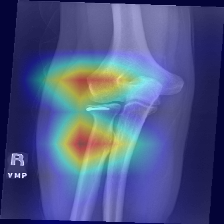

In [14]:

heatmap = grad_cam(model, final_img, layer_name=layerName,
                       label_name=['negative', 'positive'],
                       # category_id=0,
                       )

show_imgwithheat(img_path, heatmap[0])


In [15]:

from scipy.ndimage import gaussian_filter



def extended_grad_cam(model, img,
             layer_name="relu", label_name=None,
             category_id=None):
    """Get a heatmap by Grad-CAM.

    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.

    Return:
        A heatmap ndarray(without color).
    """
   # img_tensor = np.expand_dims(img, axis=2)
   # img_tensor = np.expand_dims(img, axis=3)
    start_time = time.time()

    img_tensor=img
    #print(img_tensor.shape)
    #print("GRAD CAM")

    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model(inputs=model.inputs, outputs=[conv_layer.output, model.output])
   # heatmap = np.zeros((conv_output.shape[1], conv_output.shape[2]))
    with tf.GradientTape() as gtape:
        conv_output, predictions = heatmap_model(img_tensor)
        #print(predictions)
        # if category_id is None:
        #     category_id = prediction_label(predictions[0])
        # if label_name is not None:
        #     #print('Predicted Label: '+label_name[category_id])
        output = predictions[0]
        #print(output)
        grads = gtape.gradient(output, conv_output)


        grads=gaussian_filter(grads,0.4)
        conv_output=gaussian_filter(conv_output,0.4)
        #print(grads)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
        #print(pooled_grads.shape)
    heatmap = np.zeros((conv_output.shape[1], conv_output.shape[2]))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat

    elapsed_time = time.time() - start_time
    return [np.squeeze(heatmap) , predictions[0],elapsed_time]


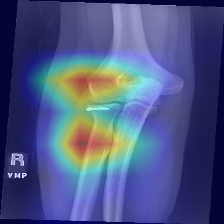

In [17]:

heatmap = extended_grad_cam(model, final_img, layer_name=layerName,
                       label_name=['negative', 'positive'],
                       # category_id=0,
                       )

show_imgwithheat(img_path, heatmap[0])

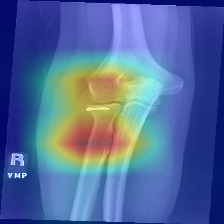

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model



def grad_cam_plusplus(model, img, layer_name="conv5_block3_out", label_name = None):
    """

    Get heatmaps by Grad-CAM++ for the top K predicted classes for ImageNet classification.

    Args:
        model: A pre-trained Keras model for ImageNet classification.
        img: An image array preprocessed for ImageNet (e.g., resized, normalized).
        layer_name: A string, name of the last convolutional layer (default: "conv5_block3_out" for many pre-trained models).
        top_k: An integer, number of top classes to generate heatmaps for (default: 5).

    Returns:
        A numpy array of shape (top_k, heatmap_height, heatmap_width) containing heatmaps.
    """

    # Get the convolutional layer and create a heatmap model
    start_time = time.time()

    conv_layer = model.get_layer(layer_name)
    top_k=1
    top_k_indices= top_k
    heatmap_model = Model(inputs=model.inputs, outputs=[conv_layer.output, model.output])

    with tf.GradientTape(persistent=True) as gtape:
        conv_output, predictions = heatmap_model(img)

        # Get top K predicted classes and probabilities
       # sorted_indices = np.argsort(np.squeeze(predictions))[::-1]
       # top_k_indices = sorted_indices[:top_k]

        # Create an empty array to store heatmaps
        heatmaps = np.zeros((top_k, conv_output.shape[1], conv_output.shape[2]))

        for i in range (1):
            output =predictions[0]  # Select specific class prediction
            grads = gtape.gradient(output, conv_output)

            # Compute alpha
            numerator = tf.square(grads)
            denominator = 2 * tf.square(grads) + tf.reduce_sum(conv_output * grads, axis=(1, 2), keepdims=True)
            denominator = tf.where(denominator != 0, denominator, tf.ones_like(denominator))
            alpha = numerator / denominator

            # Compute weights
            weights = tf.reduce_sum(alpha * tf.maximum(grads, 0), axis=(1, 2))
           # alpha_values.append(alpha.numpy().flatten())





            # Compute the Grad-CAM++ heatmap
            grad_cam_plus_plus_heatmap = tf.reduce_sum(weights * conv_output, axis=-1)
            heatmap = tf.maximum(grad_cam_plus_plus_heatmap, 0)
            heatmap = heatmap / tf.math.reduce_max(heatmap)

            heatmaps[i, :, :] = heatmap.numpy()

    et = time.time() - start_time
    return [np.squeeze(heatmaps[0]),predictions[0],et]


heatmap=grad_cam_plusplus(model,final_img,
                          label_name=['negative','positive'],layer_name=layerName)

show_imgwithheat(img_path, heatmap[0])

In [34]:
def score_cam(model, x, layer_name='relu', label_name = None,max_N=-1):
    """Score-CAM function"""

    start_time = time.time()


    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model(inputs=model.inputs, outputs=[conv_layer.output, model.output])
    act_map_array, predictions = heatmap_model(x)
    act_map_array=np.array(act_map_array)
    #print(act_map_array.shape)
    # extract effective maps
    if max_N != -1:
        act_map_std_list = [np.std(act_map_array[0, :, :, k]) for k in range(act_map_array.shape[3])]
        unsorted_max_indices = np.argpartition(-np.array(act_map_std_list), max_N)[:max_N]
        max_N_indices = unsorted_max_indices[np.argsort(-np.array(act_map_std_list)[unsorted_max_indices])]
        act_map_array = act_map_array[:, :, :, max_N_indices]
 # get input shape

    # 1. upsampled to original input size
    activations_resized = [cv2.resize(act_map_array[0,:,:,k], (224,224), interpolation=cv2.INTER_LINEAR) for k in range(act_map_array.shape[3])]

    # 2. normalize the raw activation value in each activation map into [0, 1]
    normalized_feature_maps = []
    for act_map_resized in activations_resized:
        if np.max(act_map_resized) - np.min(act_map_resized) != 0:
            act_map_normalized = act_map_resized / (np.max(act_map_resized) - np.min(act_map_resized))
        else:
            act_map_normalized = act_map_resized
        normalized_feature_maps.append(act_map_normalized)
    #print(normalized_feature_maps[0][1])
    # 3. project highlighted area in the activation map to original input space by multiplying the normalized activation map
    masked_input_list = []
    for act_map_normalized in normalized_feature_maps:
        masked_input = np.copy(x)
        for k in range(3):
            masked_input[0, :, :, k] *= act_map_normalized
        masked_input_list.append(masked_input)
    masked_input_array = np.concatenate(masked_input_list, axis=0)

    # 4. feed masked inputs into CNN model and softmax
    #print(masked_input_array.shape)
    pred_from_masked_input_array = model.predict(masked_input_array)
    #print(pred_from_masked_input_array.shape)
    # 5. define weight as the score of target class
    weights = pred_from_masked_input_array
    print(weights.shape,act_map_array.shape)
    # 6. get final class discriminative localization map as linear weighted combination of all activation maps
    heatmap = np.dot(act_map_array[0, :, :, :], weights)
    #print(heatmap.shape)
    heatmap = np.maximum(0, heatmap) # Passing through ReLU
    heatmap /= np.max(heatmap) # scale 0 to 1.0T
    # apply ReLU
    et = time.time() - start_time
    return [heatmap,predictions[0],et]




/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


52/52 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step
(1664, 1) (1, 7, 7, 1664)


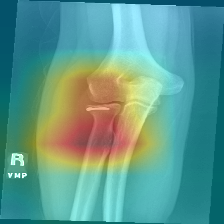

In [35]:
heatmap = score_cam(model, final_img, layer_name=layerName,
                       label_name=['negative', 'positive'],
                       # category_id=0,
                       )

show_imgwithheat(img_path, heatmap[0])

In [36]:
from tensorflow.keras.models import Model
import cv2
from scipy.signal import find_peaks
from scipy.stats import mode


def gscore_cam(model, x, layer_name='relu', label_name = None,max_N=-1):
    """Score-CAM function"""
    print("gscore_cam")
    start_time = time.time()




        # 1. Get conv feature maps and model output
    conv_layer    = model.get_layer(layer_name)
    heatmap_model = Model(inputs=model.inputs,
                          outputs=[conv_layer.output, model.output])
    act_map_array, predictions = heatmap_model(x)    # act_map_array shape: (1, h_feat, w_feat, K)
    act_map_array = np.array(act_map_array)

    # 2. Compute gradients of target class score w.r.t. conv outputs
    with tf.GradientTape() as tape:

        conv_outputs, preds = heatmap_model(x)
        # for binary classification, target_score = preds[:, 0]
        target_score = preds[0]
    grads = tape.gradient(target_score, conv_outputs)  # shape: (1, h_feat, w_feat, K)

    # 3. Compute per-channel importance g_k = mean(|grad|) over spatial dims
    grads_val = grads.numpy()[0]  # shape: (h_feat, w_feat, K)
    channel_importance = np.mean(np.abs(grads_val), axis=(0, 1))  # shape: (K,)

    # 4. Select top‐k channels by descending importance
    k = 300
    unsorted_idx = np.argpartition(-channel_importance, k)[:k]
    top_k_idx    = unsorted_idx[np.argsort(-channel_importance[unsorted_idx])]

    # 5. Filter activation maps to keep only top‐k channels
    act_map_array = act_map_array[:, :, :, top_k_idx]  # new shape: (1, h_feat, w_feat, k)



    # 1. upsampled to original input size
    activations_resized = [cv2.resize(act_map_array[0,:,:,k], (224,224), interpolation=cv2.INTER_LINEAR) for k in range(act_map_array.shape[3])]

    # 2. normalize the raw activation value in each activation map into [0, 1]
    normalized_feature_maps = []
    for act_map_resized in activations_resized:
        if np.max(act_map_resized) - np.min(act_map_resized) != 0:
            act_map_normalized = act_map_resized / (np.max(act_map_resized) - np.min(act_map_resized))
        else:
            act_map_normalized = act_map_resized
        normalized_feature_maps.append(act_map_normalized)
    #print(normalized_feature_maps[0][1])
    # 3. project highlighted area in the activation map to original input space by multiplying the normalized activation map
    masked_input_list = []
    for act_map_normalized in normalized_feature_maps:
        masked_input = np.copy(x)
        for k in range(3):
            masked_input[0, :, :, k] *= act_map_normalized
        masked_input_list.append(masked_input)
    masked_input_array = np.concatenate(masked_input_list, axis=0)

    # 4. feed masked inputs into CNN model and softmax
    #print(masked_input_array.shape)
    pred_from_masked_input_array = model.predict(masked_input_array)
    #print(pred_from_masked_input_array.shape)
    # 5. define weight as the score of target class
    weights = pred_from_masked_input_array
    print(weights.shape,act_map_array.shape)
    # 6. get final class discriminative localization map as linear weighted combination of all activation maps
    heatmap = np.dot(act_map_array[0, :, :, :], weights)
    #print(heatmap.shape)
    heatmap = np.maximum(0, heatmap) # Passing through ReLU
    heatmap /= np.max(heatmap) # scale 0 to 1.0T
    # apply ReLU
    et = time.time() - start_time
    return [heatmap,predictions[0],et]





Score CAM
10/10 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step
(300, 1) (1, 7, 7, 300)


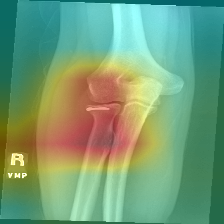

In [37]:
heatmap = gscore_cam(model, final_img, layer_name=layerName,
                       label_name=['negative', 'positive'],
                       # category_id=0,
                       )

show_imgwithheat(img_path, heatmap[0])

In [27]:
def eigen_cam(model, img,
             layer_name="relu", label_name=None,
             category_id=None):
    """Get a heatmap by Grad-CAM.

    Args:
        model: A model object, build from tf.keras 2.X.
        img: An image ndarray.
        layer_name: A string, layer name in model.
        label_name: A list or None,
            show the label name by assign this argument,
            it should be a list of all label names.
        category_id: An integer, index of the class.
            Default is the category with the highest score in the prediction.

    Return:
        A heatmap ndarray(without color).
    """
   # img_tensor = np.expand_dims(img, axis=2)
   # img_tensor = np.expand_dims(img, axis=3)
    start_time = time.time()
    img_tensor=img


    conv_layer = model.get_layer(layer_name)
    heatmap_model = Model(inputs=model.inputs, outputs=[conv_layer.output, model.output])
    conv_output, predictions = heatmap_model(img_tensor)

    if predictions[0] > 0.5:
        category_id  = 1  # Classify as abnormal
    else:
        category_id  = 0  # Classify as norma


    output = predictions[0]

    feature = tf.transpose(conv_output, [0, 3, 1, 2])
    print(feature.shape)
    s, u, v = tf.linalg.svd(feature, full_matrices=True)
    vT = tf.transpose(v, [0, 1, 3, 2])

    cam = u[..., 0, None] @ s[..., 0, None, None] @ vT[..., 0, None, :]
    cam = tf.reduce_sum(cam, 1)
    cam -= tf.reduce_min(cam)
    heatmap = np.maximum(cam, 0)
    max_heat = np.max(heatmap)
    if max_heat == 0:
        max_heat = 1e-10
    heatmap /= max_heat
    et = time.time() - start_time

    return [np.squeeze(heatmap),predictions[0],et]



(1, 1664, 7, 7)


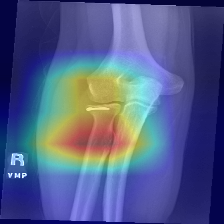

In [28]:
 heatmap=eigen_cam(model,final_img,
                          label_name=['negative','positive'],layer_name=layerName)

 show_imgwithheat(img_path, heatmap[0])